In [1]:
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
# Load images from the directory
dataset_folder = '/kaggle/input/image-dataset-for-unsupervised-clustering/photos_no_class'
image_files = [f for f in os.listdir(dataset_folder) if f.endswith('.jpg') or f.endswith('.png')]


In [3]:
# Initialize an empty list to store feature vectors
feature_vectors = []

In [4]:
# Define image size for resizing (uniform shape)
image_size = (64, 64)

In [5]:
# Load and preprocess each image
for image_file in image_files:
    img_path = os.path.join(dataset_folder, image_file)
    img = cv2.imread(img_path)
    img = cv2.resize(img, image_size)  # Resize image to fixed size
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Flatten the image and normalize
    img_flattened = img.flatten() / 255.0  # Normalize to 0-1 range
    feature_vectors.append(img_flattened)


In [6]:
# Convert list of feature vectors to numpy array
feature_vectors = np.array(feature_vectors)


In [7]:
# Number of clusters
num_clusters = 5

In [8]:
# Step 1: Initial Clustering with random centers
initial_kmeans = KMeans(n_clusters=num_clusters, init='random', n_init=1, max_iter=1, random_state=42)
initial_kmeans.fit(feature_vectors)
initial_labels = initial_kmeans.labels_

In [9]:
# Reduce dimensions with PCA for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(feature_vectors)

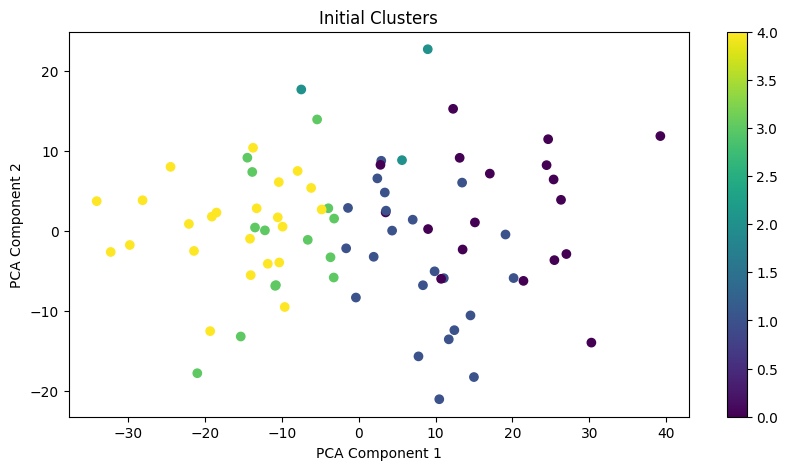

In [10]:
# Plot Initial Clusters
plt.figure(figsize=(10, 5))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=initial_labels, cmap='viridis', marker='o')
plt.title("Initial Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar()
plt.show()


In [11]:
# Step 2: Final Clustering with optimized initialization
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans.fit(feature_vectors)
final_labels = kmeans.labels_


In [12]:
# Calculate epoch size (iterations) and error rate (Mean Squared Error)
epochs = kmeans.n_iter_
mse = mean_squared_error(feature_vectors, kmeans.cluster_centers_[final_labels])


In [13]:
# Display Final Clusters
print(f"\nFinal Epoch Size: {epochs}")
print(f"Final Error Rate (MSE): {mse}")



Final Epoch Size: 6
Final Error Rate (MSE): 0.057216341758121646


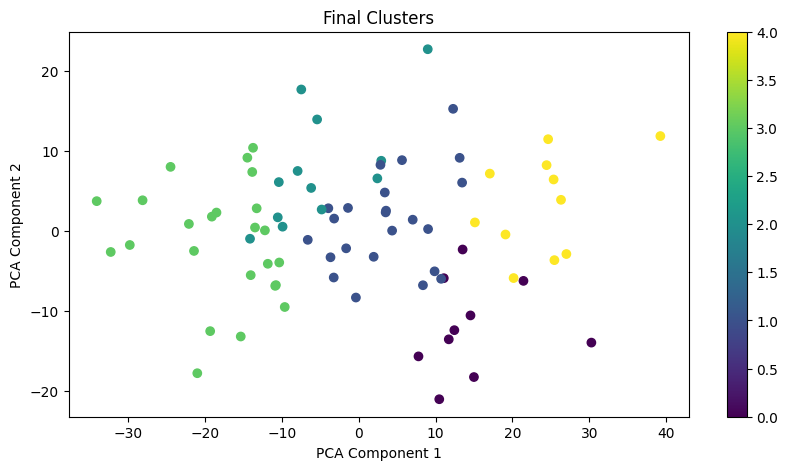

In [14]:
# Plot Final Clusters
plt.figure(figsize=(10, 5))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=final_labels, cmap='viridis', marker='o')
plt.title("Final Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar()
plt.show()